# Proyek Analisis Data: Bike Sharing Dataset

* **Nama:** Galung Reinan Artanca
* **Email:** galung.reiarta23@gmail.com
* **ID Dicoding:** galung_reinan

## Pertanyaan:

* Bagaimana Tren Penyewa Sepeda/Pengguna sepeda dari tahun 2011 sampai dengan 2012 atau berdasarkan Musim yang terjadi?
* Bagaimana Pengaruh Hari (Holiday/Not Holiday) dan Waktu (Jam berapa rata-rata pengguna paling sering menyewa sepeda) Terhadap Penyhewaan Sepeda?
* Bagaimana Perbandingan Pengguna/Penyewa Sepeda (Registered / Casual) Penyewaan Sepeda?
* Bagaimana Pengaruh Faktor Lingkungan (Temperatur,Atemp,WindSpeed, dan Humidity) terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [100]:
df_hour = pd.read_csv('hour.csv')
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [101]:
df_hour.shape  # Jumlah baris dan kolom

(17379, 17)

In [102]:
# Menilai Tabel df_hour
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [103]:
df_hour.describe()  # Statistik deskriptif numerik

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [104]:
df_hour.isnull().sum()  # Jumlah nilai hilang per kolom

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [105]:
df_hour.duplicated().sum()  # Jumlah baris duplikat

0

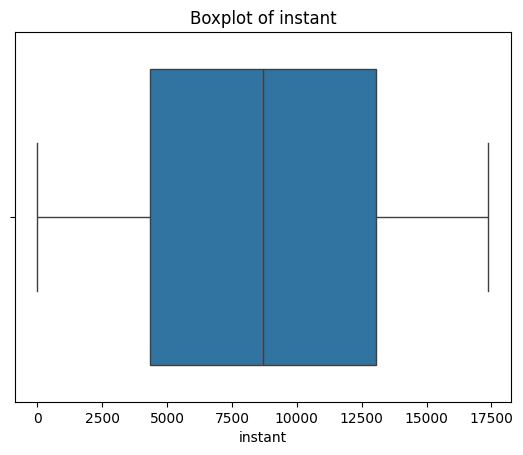

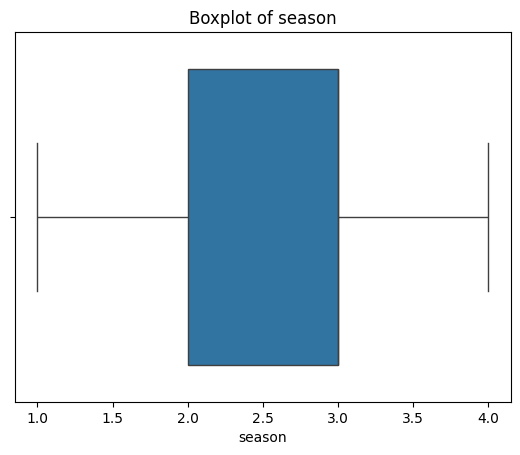

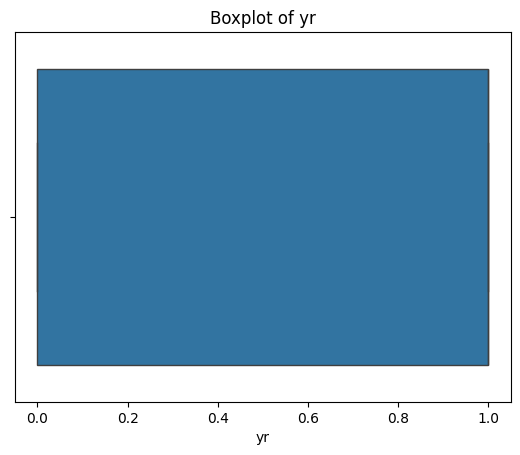

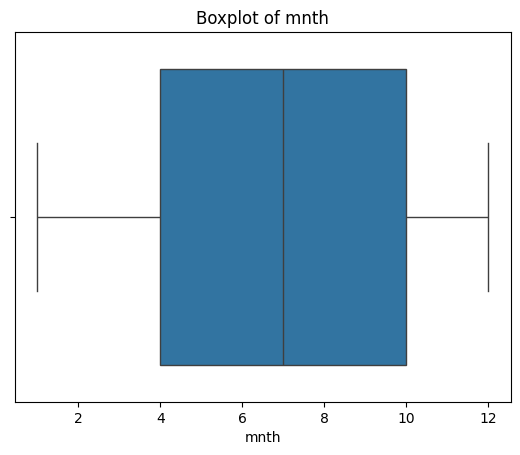

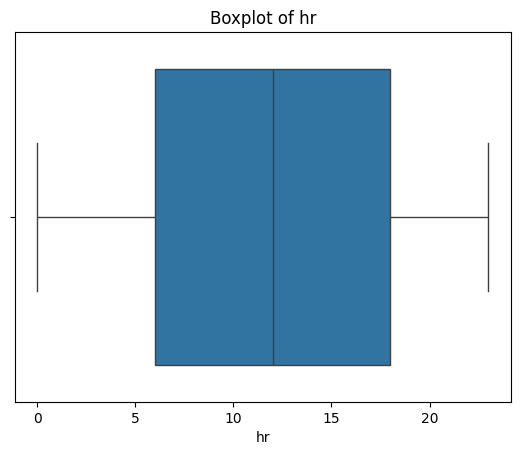

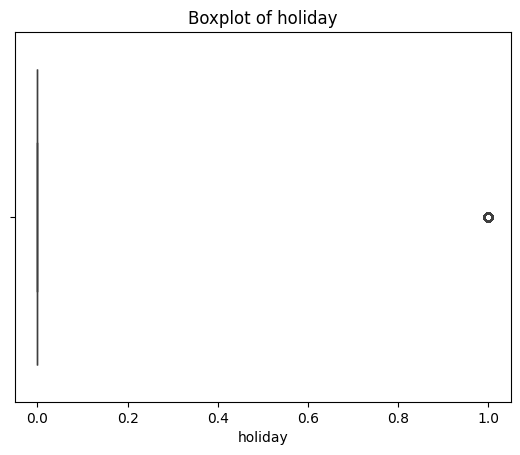

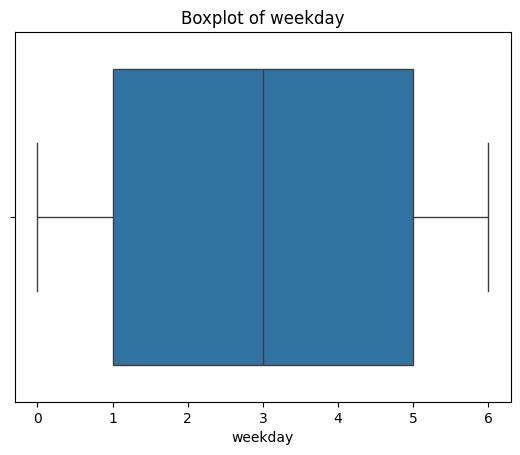

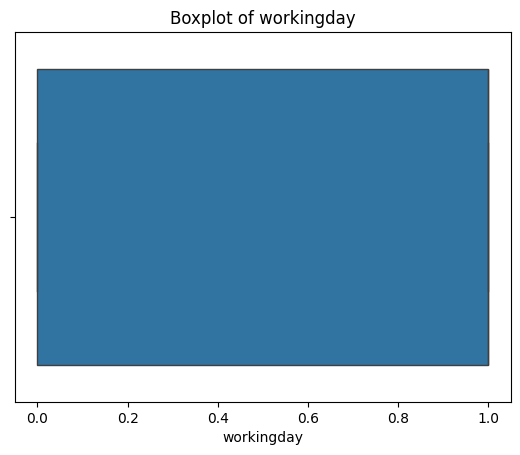

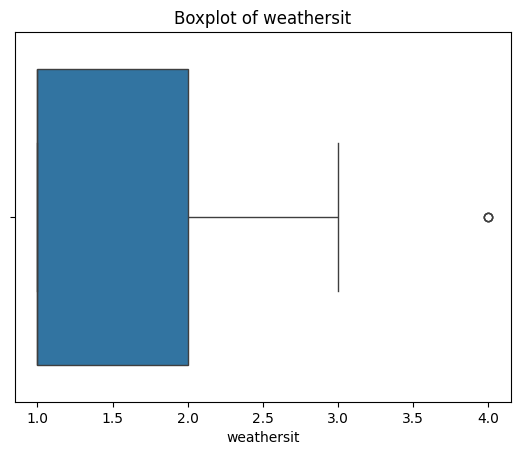

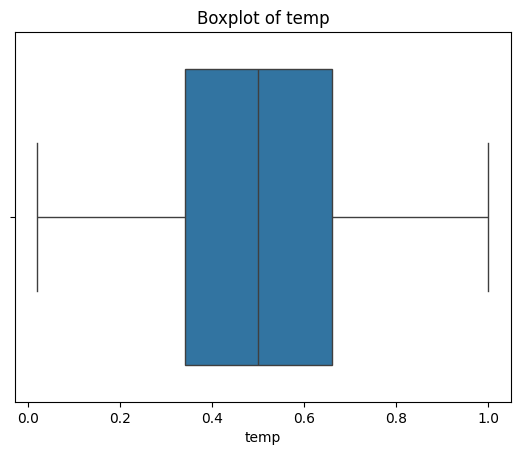

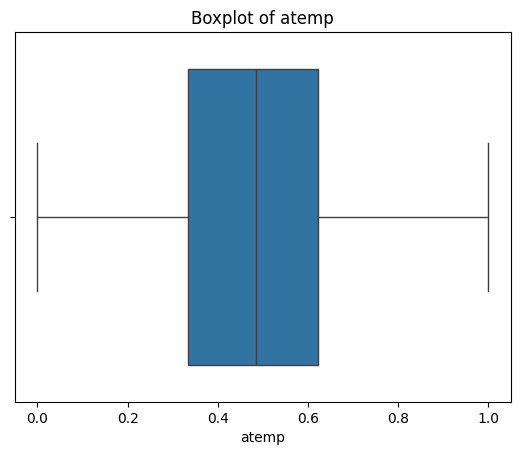

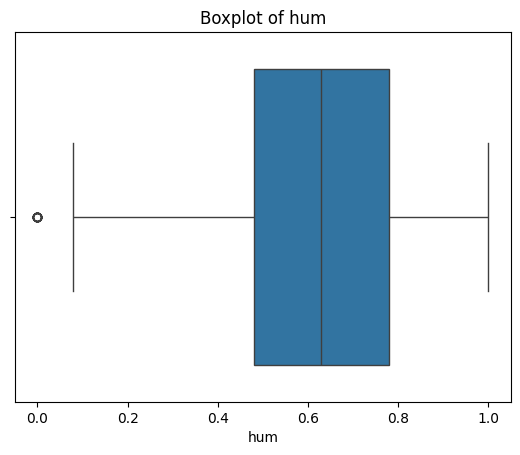

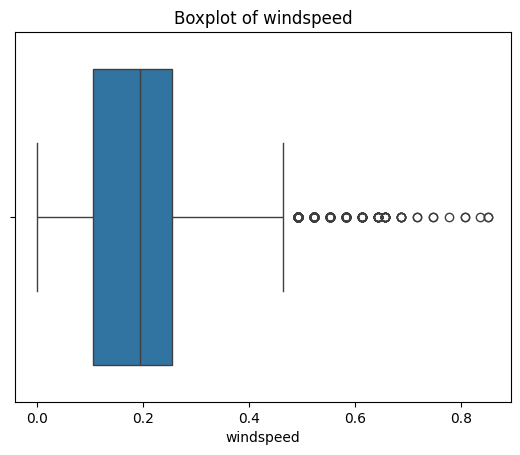

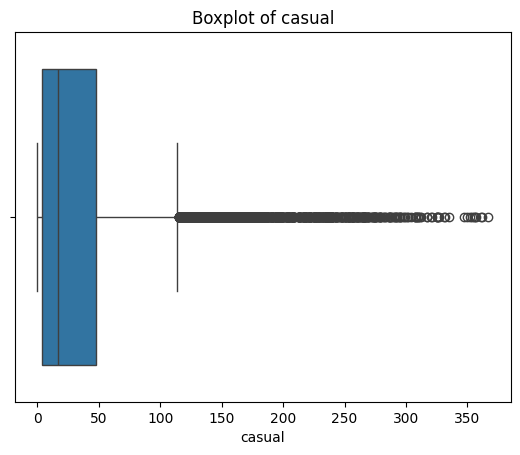

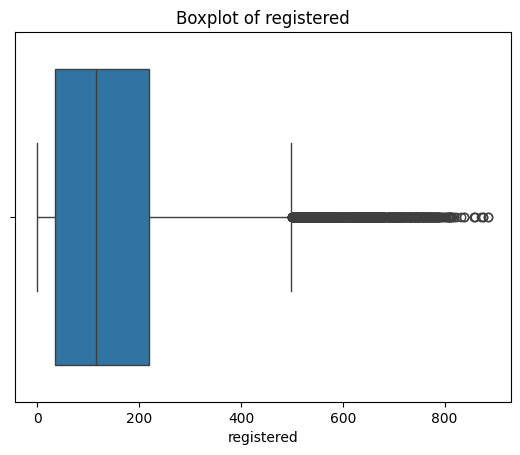

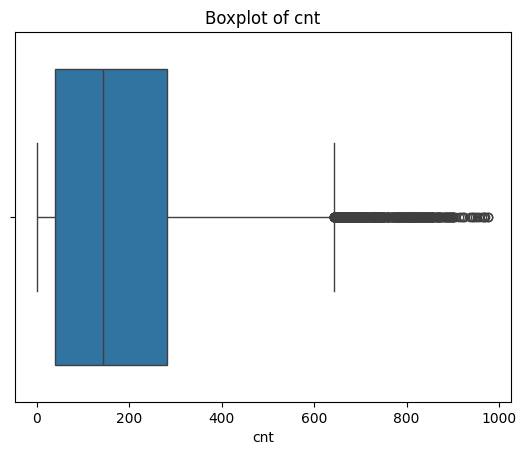

In [106]:
# Visualisasi distribusi data numerik
for col in df_hour.select_dtypes(include=['float64', 'int64']):
    sns.boxplot(x=df_hour[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [107]:
# Memastikan tipe data sudah sesuai dengan yang diharapkan
df_hour.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [108]:
df_hour.nunique()

instant       17379
dteday          731
season            4
yr                2
mnth             12
hr               24
holiday           2
weekday           7
workingday        2
weathersit        4
temp             50
atemp            65
hum              89
windspeed        30
casual          322
registered      776
cnt             869
dtype: int64

In [109]:
for col in df_hour.select_dtypes(include=['object']):
    print(col)
    print(df_hour[col].unique())

dteday
['2011-01-01' '2011-01-02' '2011-01-03' '2011-01-04' '2011-01-05'
 '2011-01-06' '2011-01-07' '2011-01-08' '2011-01-09' '2011-01-10'
 '2011-01-11' '2011-01-12' '2011-01-13' '2011-01-14' '2011-01-15'
 '2011-01-16' '2011-01-17' '2011-01-18' '2011-01-19' '2011-01-20'
 '2011-01-21' '2011-01-22' '2011-01-23' '2011-01-24' '2011-01-25'
 '2011-01-26' '2011-01-27' '2011-01-28' '2011-01-29' '2011-01-30'
 '2011-01-31' '2011-02-01' '2011-02-02' '2011-02-03' '2011-02-04'
 '2011-02-05' '2011-02-06' '2011-02-07' '2011-02-08' '2011-02-09'
 '2011-02-10' '2011-02-11' '2011-02-12' '2011-02-13' '2011-02-14'
 '2011-02-15' '2011-02-16' '2011-02-17' '2011-02-18' '2011-02-19'
 '2011-02-20' '2011-02-21' '2011-02-22' '2011-02-23' '2011-02-24'
 '2011-02-25' '2011-02-26' '2011-02-27' '2011-02-28' '2011-03-01'
 '2011-03-02' '2011-03-03' '2011-03-04' '2011-03-05' '2011-03-06'
 '2011-03-07' '2011-03-08' '2011-03-09' '2011-03-10' '2011-03-11'
 '2011-03-12' '2011-03-13' '2011-03-14' '2011-03-15' '2011-03-16'
 '2

### Cleaning Data

In [110]:
df_hour[df_hour.duplicated()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt


In [111]:
# 1. Menghapus duplikasi data
df_hour.drop_duplicates(inplace=True)

In [112]:
# 2. Mengatasi nilai yang hilang
#   - Menghapus baris dengan nilai hilang
df_hour.dropna(inplace=True)

In [113]:
# Memperbaiki tipe data
datetime_columns = ["dteday"]

for column in datetime_columns:
    df_hour[column] = pd.to_datetime(df_hour[column])

df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

### Exploratory Data Analysis (EDA)

### Explore df_hour

In [114]:
df_hour.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
5703,5704,2011-08-31,3,0,8,2,0,3,1,1,0.56,0.5303,0.73,0.0000,1,5,6
10061,10062,2012-02-29,1,1,2,7,0,3,1,2,0.26,0.2727,0.81,0.1343,11,242,253
15998,15999,2012-11-04,4,1,11,7,0,0,0,1,0.26,0.2727,0.65,0.1045,11,39,50
171,172,2011-01-08,1,0,1,10,0,6,0,2,0.18,0.1970,0.80,0.1642,5,56,61
14281,14282,2012-08-23,3,1,8,6,0,4,1,2,0.60,0.5455,0.88,0.0896,14,178,192


In [115]:
# Mengubah nama kolom data

df_hour = df_hour.rename(columns={
    'yr':'Year',
    'mnth':'Month',
    'hr':'Hour',
    'weathersit':'Weather',
    'hum':'Humidity',
    'cnt':'Count'
})
df_hour.head()

,instant,dteday,season,Year,Month,Hour,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,casual,registered,Count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [116]:
df_hour.describe(include="all")

,instant,dteday,season,Year,Month,Hour,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,casual,registered,Count
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [117]:
df_hour.dteday.is_unique

False

In [118]:
# Mengubah nilai season dari numerik ke kategorikal
def map_season(x):
    return{
        1:'Springer',
        2:'Summer',
        3:'Fall',
        4:'Winter'
    }.get(x, 'unknown')
df_hour['season'] = df_hour['season'].apply(map_season)
df_hour.head()

,instant,dteday,season,Year,Month,Hour,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,casual,registered,Count
0,1,2011-01-01,Springer,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [119]:
# Mengubah nilai month dari numerik ke kategorikal
def map_month(x):
    return{
        1:'Januari',
        2:'Februari',
        3:'Maret',
        4:'April',
        5:'Mei',
        6:'Juni',
        7:'Juli',
        8:'Agustus',
        9:'September',
        10:'Oktober',
        11:'November',
        12:'Desember'
    }.get(x, 'unknown')
df_hour['Month'] = df_hour['Month'].apply(map_month)
df_hour.head()

,instant,dteday,season,Year,Month,Hour,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,casual,registered,Count
0,1,2011-01-01,Springer,0,Januari,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,Springer,0,Januari,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,Springer,0,Januari,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,Springer,0,Januari,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,Springer,0,Januari,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [120]:
df_hour.groupby(by="season").agg({
    "casual": "sum",
    "registered": "sum",
    "Count": "sum"
}).sort_values(by="Count", ascending=False)

,casual,registered,Count
season,,,
Fall,226091,835038,1061129
Summer,203522,715067,918589
Winter,129782,711831,841613
Springer,60622,410726,471348


In [121]:
df_hour.groupby(by="Month").agg({
    "casual": "sum",
    "registered": "sum",
    "Count": "sum"
}).sort_values(by="Count", ascending=False)

,casual,registered,Count
Month,,,
Agustus,72039,279155,351194
Juni,73906,272436,346342
September,70323,275668,345991
Juli,78157,266791,344948
Mei,75285,256401,331686
Oktober,59760,262592,322352
April,60802,208292,269094
November,36603,218228,254831
Maret,44444,184476,228920


In [122]:
df_hour['holiday'] = df_hour['holiday'].apply(lambda x: {1: 'Holiday', 0: 'Not Holiday'}.get(x, 'unknown'))

df_hour.groupby(by="holiday").agg({
    "Count": "sum"
}).sort_values(by="Count", ascending=False)

,Count
holiday,
Not Holiday,3214244
Holiday,78435


In [123]:
df_hour.groupby(by="Weather").agg({
    "Count": "sum"
}).sort_values(by="Count", ascending=False)

,Count
Weather,
1,2338173
2,795952
3,158331
4,223


### Visualization & Explanatory Analysis

#### Pertanyaan 1: 
* Bagaimana Tren Penyewa Sepeda/Pengguna sepeda dari tahun 2011 sampai dengan 2012 atau berdasarkan Musim yang terjadi?

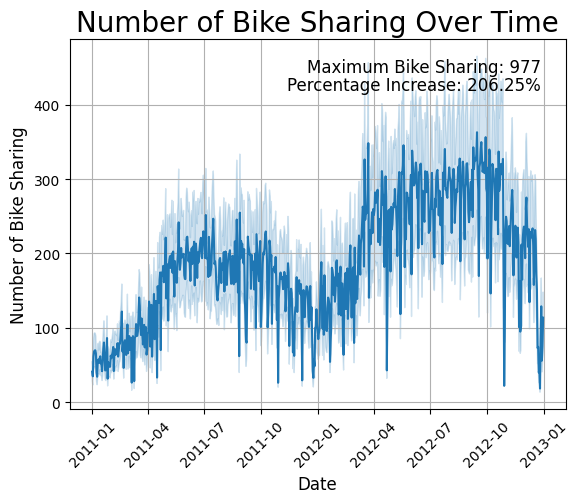

In [124]:
# Membuat line plot
sns.lineplot(x='dteday', y='Count', data=df_hour)

# Menambahkan judul dan label
plt.title("Number of Bike Sharing Over Time", loc="center", fontsize=20)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Bike Sharing", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)

# Mencari nilai maksimum penyewa sepeda
max_count = df_hour['Count'].max()

# Menambahkan teks yang menunjukkan nilai maksimum
plt.text(x=0.95, y=0.95, s=f"Maximum Bike Sharing: {max_count}", 
        transform=plt.gca().transAxes, fontsize=12, ha='right', va='top')

# Menghitung persentase peningkatan (jika diperlukan)
# Anda perlu menentukan periode awal dan akhir untuk perhitungan ini
# Misalnya, jika ingin menghitung peningkatan dari awal hingga akhir data:
start_count = df_hour['Count'].iloc[0]
end_count = df_hour['Count'].iloc[-1]
percentage_increase = ((end_count - start_count) / start_count) * 100
plt.text(x=0.95, y=0.9, s=f"Percentage Increase: {percentage_increase:.2f}%", 
        transform=plt.gca().transAxes, fontsize=12, ha='right', va='top')

plt.show()

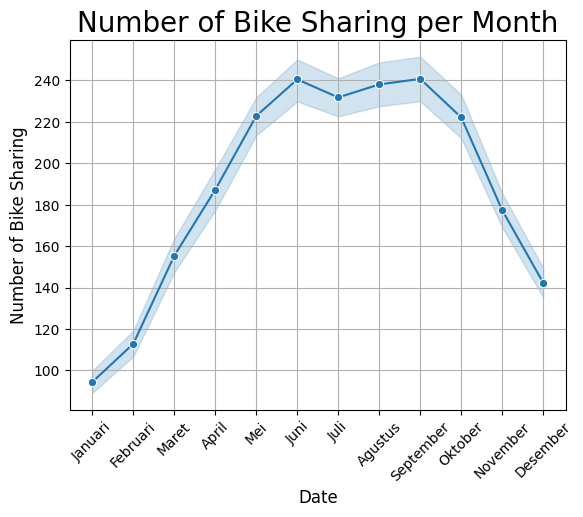

In [125]:
sns.lineplot(x='Month', y='Count', data=df_hour,  marker='o')

plt.title("Number of Bike Sharing per Month", loc="center", fontsize=20)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Number of Bike Sharing", fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=10)

plt.grid(True)
plt.show()

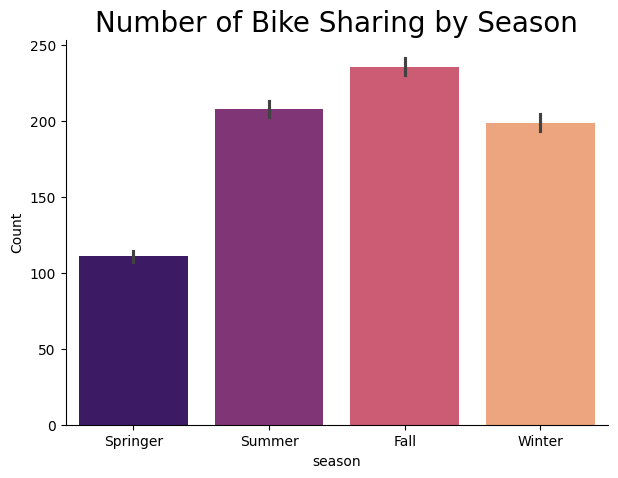

In [126]:
f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)
sns.barplot(x='season', y='Count', data=df_hour, hue='season', palette='magma', legend=False) 

plt.title("Number of Bike Sharing by Season", loc="center", fontsize=20)
plt.show()

#### Pertanyaan 2:
* Bagaimana Pengaruh Hari (Holiday/Not Holiday) dan Waktu (Jam berapa rata-rata pengguna paling sering menyewa sepeda) Terhadap Penyhewaan Sepeda?

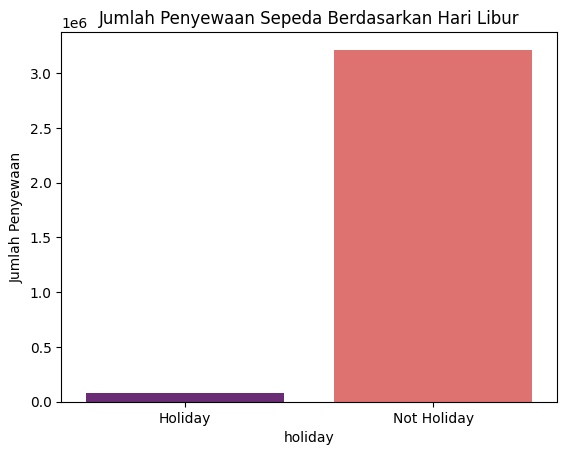

       holiday    Count
0      Holiday    78435
1  Not Holiday  3214244


In [127]:
# Kelompokkan data berdasarkan hari libur dan hitung jumlah penyewaan
holiday_counts = df_hour.groupby('holiday')['Count'].sum().reset_index()

# Visualisasi menggunakan bar plot
sns.barplot(x='holiday', y='Count', data=holiday_counts, hue='holiday',palette='magma')
plt.title("Jumlah Penyewaan Sepeda Berdasarkan Hari Libur")
plt.ylabel("Jumlah Penyewaan")

# Menampilkan nilai aktual pada grafik (opsional)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

plt.show()

# Menampilkan dalam bentuk tabel
print(holiday_counts)

Jam penyewaan terbanyak adalah pukul 17 dengan jumlah 336860 penyewaan.


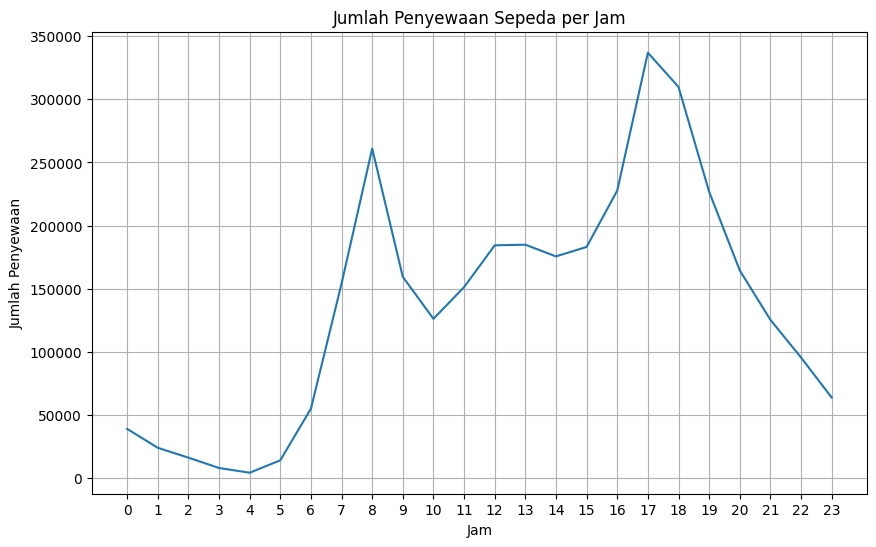

In [128]:
# Mengelompokkan data berdasarkan jam dan hitung jumlah penyewaan
hourly_counts = df_hour.groupby('Hour')['Count'].sum()

# Menemukan jam dengan penyewaan terbanyak
max_hour = hourly_counts.idxmax()
max_count = hourly_counts.max()

print("Jam penyewaan terbanyak adalah pukul", max_hour, "dengan jumlah", max_count, "penyewaan.")

# Visualisasi data
plt.figure(figsize=(10, 6))
plt.plot(hourly_counts.index, hourly_counts)
plt.xlabel('Jam')
plt.ylabel('Jumlah Penyewaan')
plt.title('Jumlah Penyewaan Sepeda per Jam')
plt.xticks(range(24))
plt.grid(True)
plt.show()

#### Pertanyaan 3:
* Bagaimana Perbandingan Pengguna/Penyewa Sepeda (Registered / Casual) Penyewaan Sepeda?

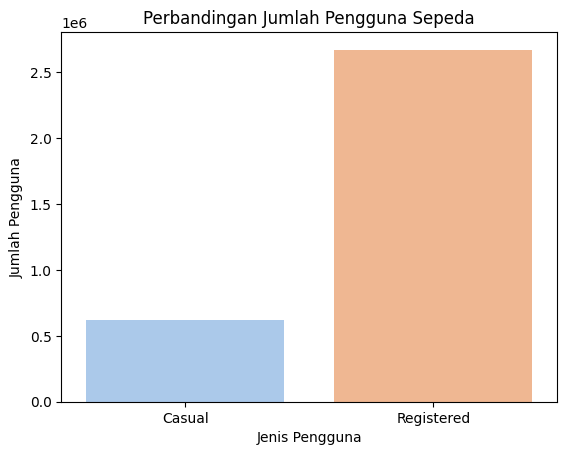

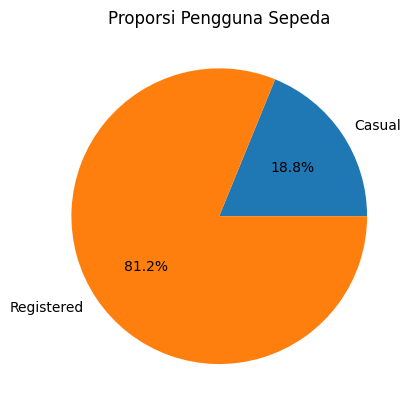

In [129]:
# Menghitung jumlah total casual dan registered
casual_counts = df_hour['casual'].sum()
registered_counts = df_hour['registered'].sum()

# Membuat DataFrame untuk perbandingan
comparison_data = pd.DataFrame({'Jenis Pengguna': ['Casual', 'Registered'],'Jumlah': [casual_counts, registered_counts]})

# Menghitung proporsi
comparison_data['Proporsi (%)'] = comparison_data['Jumlah'] / comparison_data['Jumlah'].sum() * 100

# Visualisasi menggunakan bar plot
sns.barplot(x='Jenis Pengguna', y='Jumlah', data=comparison_data, hue='Jenis Pengguna',palette='pastel')
plt.title('Perbandingan Jumlah Pengguna Sepeda')
plt.ylabel('Jumlah Pengguna')
plt.show()

# Visualisasi menggunakan pie chart
plt.pie(comparison_data['Jumlah'], labels=comparison_data['Jenis Pengguna'], autopct='%1.1f%%')
plt.title('Proporsi Pengguna Sepeda')
plt.show()

#### Pertanyaan 4:
* Bagaimana Pengaruh Faktor Lingkungan (Temperatur,Atemp,WindSpeed, dan Humidity) terhadap jumlah penyewaan sepeda?

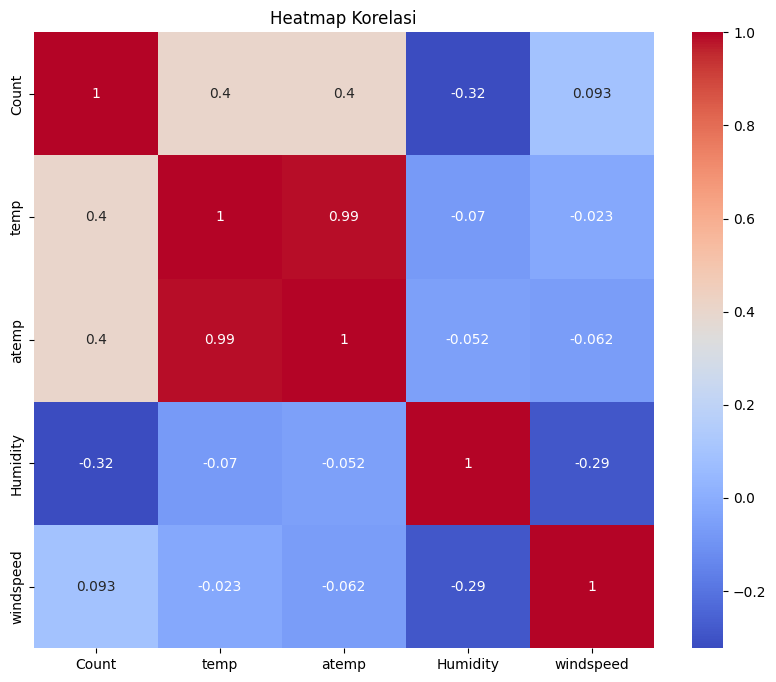

In [130]:
data = df_hour[['Count', 'temp', 'atemp', 'Humidity', 'windspeed']]

# Hitung matriks korelasi
correlation_matrix = data.corr()

# Buat heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()

## Conclusion

##### Berdasarkan analisis data penyewaan sepeda dari tahun 2011 hingga 2012, dapat disimpulkan bahwa:

1. Tren Penggunaan Sepeda (Penyewaan Sepeda):

- Terdapat peningkatan yang signifikan sebesar 206.25% pada jumlah total penyewaan sepeda dari tahun 2011 ke 2012, dengan puncak tertinggi terjadi pada bulan September 2012 dengan jumlah penyewa 977. Hal ini menunjukkan adanya tren peningkatan minat masyarakat terhadap penggunaan sepeda sebagai alternatif transportasi maupun rekreasi.
- Fluktuasi musiman sangat mempengaruhi jumlah penyewaan. Musim gugur (Fall) menjadi periode dengan jumlah penyewaan tertinggi, diikuti oleh musim panas (Summer). Sebaliknya, musim dingin (Winter) dan musim semi (Spring) cenderung memiliki jumlah penyewaan yang lebih rendah.
2. Pengaruh Hari dan Waktu:

- Hari kerja umumnya memiliki jumlah penyewaan yang lebih tinggi dengan jumlah penyewa 3214244 dibandingkan dengan akhir pekan dan hari libur yang mendapatkan jumlah penyewa 78435. Hal ini mengindikasikan bahwa banyak pengguna sepeda memanfaatkan layanan ini untuk keperluan sehari-hari seperti bekerja atau bersekolah.
- Puncak penyewaan terjadi pada sekitar pukul 17.00 dengan rata-rata jumlah penyewa 336860, menunjukkan bahwa banyak pengguna memanfaatkan waktu sore hari untuk bersepeda santai atau berolahraga.
3. Perbandingan Pengguna:

- Pengguna terdaftar (registered) secara konsisten menyumbang proporsi yang lebih besar terhadap total penyewaan dengan presentase mencapai 81.2% dibandingkan dengan pengguna kasual dengan presentase 18.8%. Hal ini menunjukkan bahwa program keanggotaan efektif dalam mendorong penggunaan berulang dan meningkatkan loyalitas pelanggan.
4. Pengaruh Faktor Lingkungan:

- Temperatur: Terdapat korelasi positif yang kuat antara suhu udara dan jumlah penyewaan sepeda. Semakin tinggi suhu, semakin banyak orang yang memilih untuk bersepeda.
- Suhu yang Dirasakan (Atemp): Selain suhu udara, suhu yang dirasakan juga memiliki pengaruh yang signifikan terhadap keputusan seseorang untuk bersepeda. Suhu yang dirasakan yang lebih nyaman cenderung meningkatkan jumlah penyewaan.
- Kecepatan Angin: Kecepatan angin yang tinggi dapat mengurangi kenyamanan bersepeda dan berdampak negatif pada jumlah penyewaan.
- Kelembapan: Berdasarkan data yang ada, tidak ditemukan korelasi yang signifikan antara kelembapan dan jumlah penyewaan.

##### Saran dan Rekomendasi:

1. Optimasi Program Keanggotaan:
- Tingkatkan benefit program keanggotaan untuk menarik lebih banyak pengguna dan meningkatkan frekuensi penggunaan.
- Personalisasi penawaran berdasarkan preferensi pengguna untuk meningkatkan relevansi dan kepuasan.
2. Pengembangan Infrastruktur:
- Perluas jaringan stasiun sepeda dan jalur sepeda untuk meningkatkan aksesibilitas dan kenyamanan bersepeda.
- Kolaborasi dengan pemerintah dan pihak terkait untuk menciptakan lingkungan yang lebih ramah sepeda.
3. Promosi Berbasis Musim:
- Melakukan kampanye promosi yang disesuaikan dengan setiap musim untuk mendorong penggunaan sepeda.
- Menawarkan paket atau promo khusus selama periode dengan permintaan rendah untuk meratakan distribusi penyewaan.